In [1]:
import pandas as pd
from yaml import load, Loader
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#from planktonsdm.post import post

In [2]:
#If you want to debug the package without repackaging, you can read files locally:

import sys
sys.path.insert(0, '/home/phyto/Abil/planktonsdm/')
from post import post

In [3]:
with open('/home/phyto/Abil/configuration/ensemble_regressor.yml', 'r') as f:
    model_config = load(f, Loader=Loader)

species = 'Umbellosphaera tenuis'
species = 'Emiliania huxleyi'


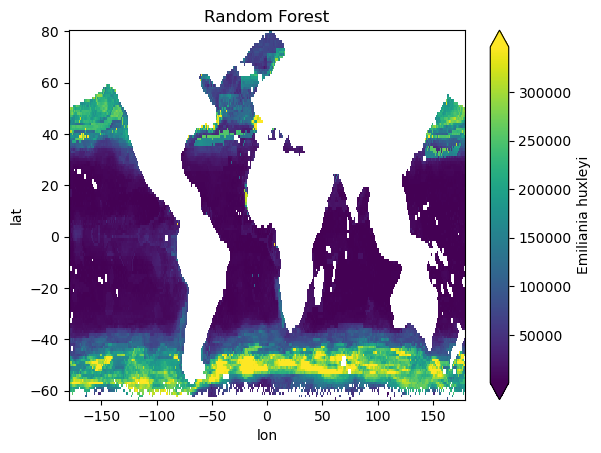

In [4]:
ds = xr.load_dataset(model_config['local_root'] + model_config['path_out'] + "rf/predictions/" + species + ".nc")
#ds[species] = np.log(ds[species]+1)
ds[species].mean(dim=["depth"]).plot(robust=True)
plt.title("Random Forest")
plt.show()

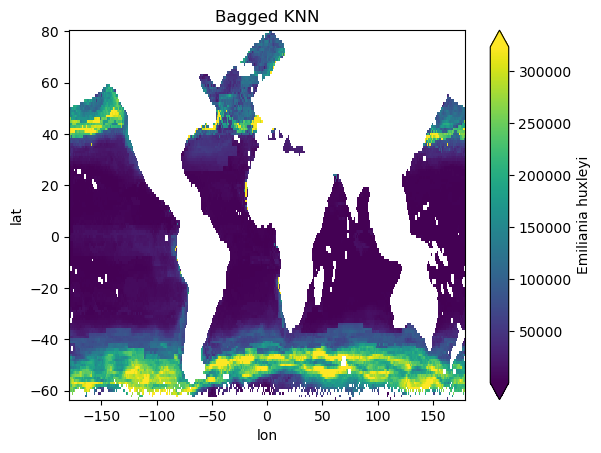

In [5]:
ds = xr.load_dataset(model_config['local_root'] + model_config['path_out'] + "knn/predictions/" + species + ".nc")
#ds[species] = np.log(ds[species]+1)
ds[species].mean(dim=["depth"]).plot(robust=True)
plt.title("Bagged KNN")
plt.show()

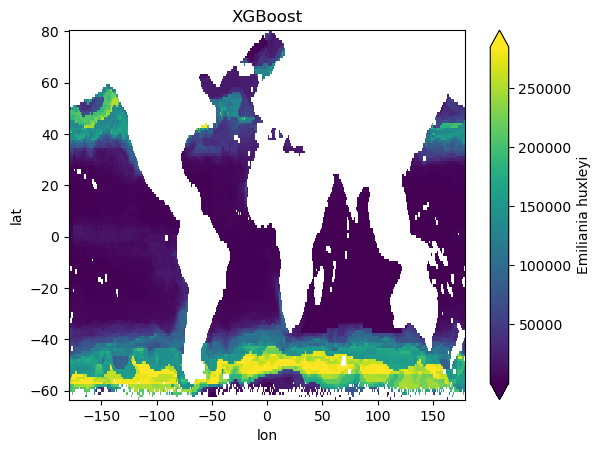

In [6]:
ds = xr.load_dataset(model_config['local_root'] + model_config['path_out'] + "xgb/predictions/" + species + ".nc")
#ds[species] = np.log(ds[species]+1)
ds[species].mean(dim=["depth"]).plot(robust=True)
plt.title("XGBoost")
plt.show()

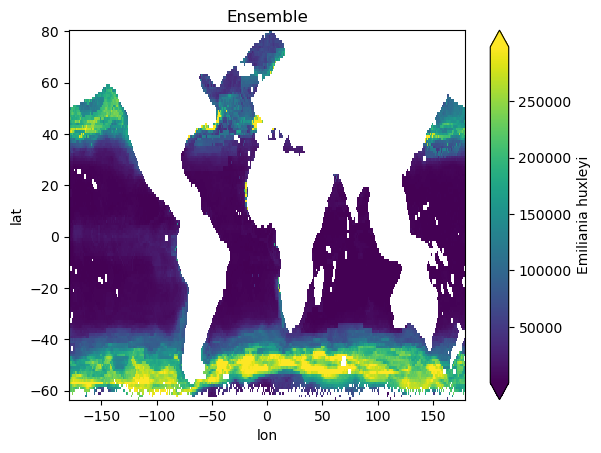

In [7]:
ds = xr.load_dataset(model_config['local_root'] + model_config['path_out'] + "ens/predictions/" + species + ".nc")
#ds[species] = np.log(ds[species]+1)
ds[species].mean(dim=["depth"]).plot(robust=True)
plt.title("Ensemble")
plt.show()

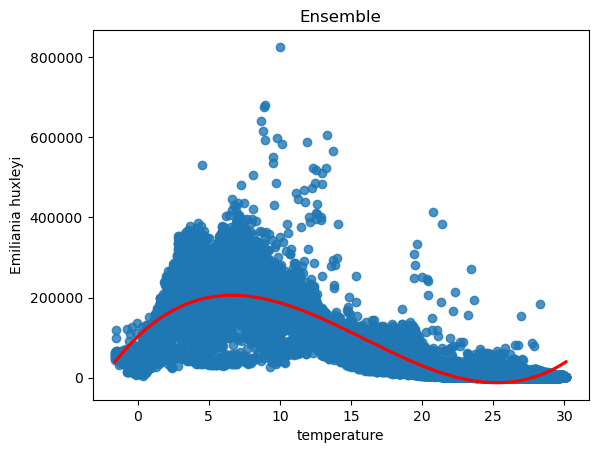

In [21]:
'''
Some simple plotting with seaborn
https://seaborn.pydata.org/

'''
import seaborn as sns

ds = xr.load_dataset(model_config['local_root'] + model_config['path_out'] + "19_oct.nc")
#ds[species] = np.log(ds[species]+1)
y = ds[species].to_dataframe()
x = ds['temperature'].to_dataframe()

sns.regplot(x=x, y=y, order=3, line_kws=dict(color="r"))
plt.title("Ensemble: Ehux vs temperature")
plt.show()